# Estudando distribuições de Probabilidade

O objetivos das próximas aulas é entender os conceitos de distribuição de probabilidades, dentre elas, as mais conhecidas **Binomial**, **Normal** e **de Poisson**.

Quais as distribuições de probabilidade que vocês conhecem?
Qual o motivo/importância de conhecer mais de uma distribuição de probabilidade?
Qual a diferença e quando utilizar diferentes distribuições de probabilidade?

## Problemas motivadores
1) Vocês vão jogar uma moeda viciada, no qual a probabilidade de sair cara é 60%. Jogando a moeda 1000 vezes, quantas vezes espera-se que saia coroa?

2) Vocês trabalham no setor de qualidade de uma granja e precisarão analisar dados referentes à perdas por embalagem de 20 unidades. Sabendo que precisa de um intervalo de 95% de confiança para seu estudo e o limite de perdas é 2 ovos por embalagem, calcule a probabilidade de que as cartelas de ovos cheguem com no máximo 2 ovos quebrados.

Após os dois cálculos, o que os dois problemas hipotéticos têm em comum?

Problema 1 - Espera-se 400 coroas em 1000 jogadas.


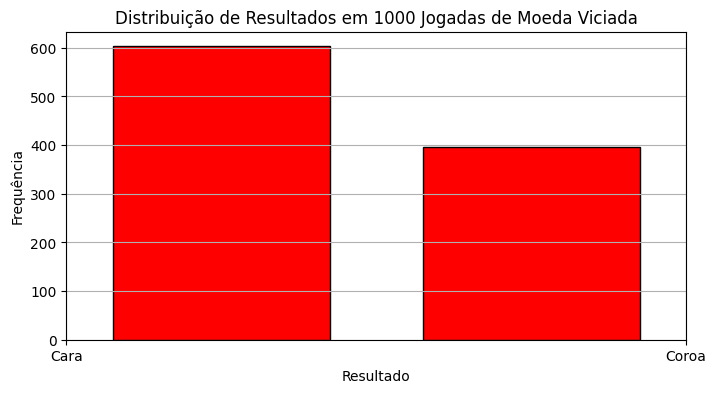

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n_jogadas = 1000
p_cara = 0.6
p_coroa = 1 - p_cara

esperado_coroas = n_jogadas * p_coroa
print(f"Problema 1 - Espera-se {esperado_coroas:.0f} coroas em {n_jogadas} jogadas.")

simulacoes = np.random.binomial(n=1, p=p_coroa, size=n_jogadas)
total_coroas = np.sum(simulacoes)

plt.figure(figsize=(8, 4))
plt.hist(simulacoes, bins=2, edgecolor='black', rwidth=0.7, color='red')  # cor vermelha adicionada
plt.xticks([0, 1], ['Cara', 'Coroa'])
plt.title('Distribuição de Resultados em 1000 Jogadas de Moeda Viciada')
plt.xlabel('Resultado')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


Problema 2 - Probabilidade de até 2 ovos quebrados: 92.45%


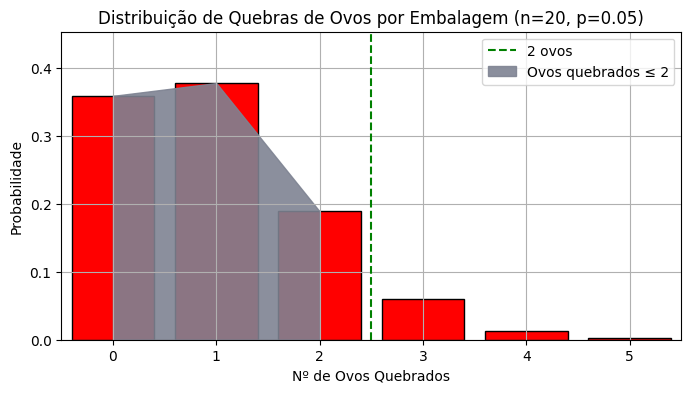

In [8]:
# 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n_ovos = 20
p_quebra = 0.05 #chance de cada ovo estar quebrado é de 5%

x = np.arange(0, n_ovos + 1)
fmp = binom.pmf(x, n_ovos, p_quebra)#função de massa de probabilidade
fda = binom.cdf(2, n_ovos, p_quebra)#função de distribuição acumulada

print(f"Problema 2 - Probabilidade de até 2 ovos quebrados: {fda*100:.2f}%")

plt.figure(figsize=(8, 4))
plt.bar(x, fmp, color='red', edgecolor='black')

plt.xticks(x[x <= 5])

plt.xlim(-0.5, 5.5)
plt.ylim(0, max(fmp[:4]) * 1.2)

plt.axvline(x=2.5, color='green', linestyle='--', label='2 ovos')
plt.fill_between(x[:3], fmp[:3], color='#7E8392', alpha=0.9, label='Ovos quebrados ≤ 2')

plt.title('Distribuição de Quebras de Ovos por Embalagem (n=20, p=0.05)')
plt.xlabel('Nº de Ovos Quebrados')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid(True)
plt.show()
